In [0]:
import cv2
import os
import numpy as np
import imutils

In [0]:
!git clone https://github.com/eeshashetty/Pokedex.git
  

fatal: destination path 'Pokedex' already exists and is not an empty directory.


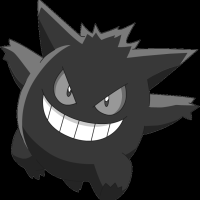

In [0]:
def changeimg(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img1 = imutils.resize(img,height = 200)
    w = img1.shape[1]
    if w<200:
        img2 = imutils.resize(img,width = 200)
        h = img2.shape[0]
        return img2[int((h-200)/2):int((h+200)/2), 0:200]
    else:
        return img1[0:200, int((w-200)/2):int((w+200)/2)]
      
from google.colab.patches import cv2_imshow
im = cv2.imread("/content/Pokedex/pokemon/Gengar/05.png")      
#cv2_imshow(im)
cv2_imshow(changeimg(im))

In [0]:
X = []
y= []
for i in os.listdir("/content/Pokedex/pokemon"):
  for j in os.listdir("/content/Pokedex/pokemon/"+i):
    x = "/content/Pokedex/pokemon/"+i+"/"+j
    img = cv2.imread(x)
    new_img = changeimg(img)
    X.append(new_img)
    y.append(i)
    
X = np.array(X)
X = X.reshape(100,-1)
X.shape

(100, 40000)

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)  
y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.20, shuffle = True)
y_test
X_train.shape

(80, 40000)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 18 , whiten = True)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape

(80, 18)

In [0]:
from sklearn.svm import SVC
model = SVC(C=1000, class_weight = 'balanced', kernel='rbf', gamma=0.005)
model.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = model.predict(X_test)
y_pred

array([3, 1, 4, 2, 4, 1, 3, 3, 2, 1, 2, 1, 0, 3, 2, 4, 4, 4, 2, 3])

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, 1, 1],
       [0, 4, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 1, 3, 1],
       [0, 0, 1, 1, 3]])

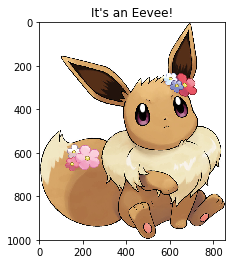

In [0]:
labels = ["Eevee", "Gengar", "Jigglypuff","Pikachu","Squirtle"]
im = cv2.imread("/content/Pokedex/ev.jpg")
new_im = changeimg(im)
I = np.array([new_im]).reshape(1,-1)
I.shape
I_pca = pca.transform(I)
index = int(model.predict(I_pca))
s = "It's an "+labels[index]+"!"

import matplotlib.pyplot as plt
im1 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imgplot=plt.imshow(im1)
plt.title(s)
plt.show()